<a href="https://colab.research.google.com/github/skywalker0803r/ALK-/blob/main/ALK%E7%A1%AB%E9%85%B8%E8%85%90%E8%9D%95%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('AKL單元冷凍系統操作條件(20100101_20141231).xlsx',index_col=0,skiprows=2)
for i in df.columns:
  df[i] = pd.to_numeric(df[i],errors='coerce')
df = df.iloc[1:,:]
df = df.dropna(axis=1,how='all').dropna(axis=0)
df.head()

,入口溫度,出口溫度,入口壓力,出口壓力,出口溫度.1,出口流量,硫酸濃度
2014/12/25,8.1,66.2,0.1,4.8,28.5,231.4,91.98
2014/12/26,7.9,66.2,0.1,4.8,28.4,231.1,91.66
2014/12/27,8.2,66.3,0.1,4.8,28.4,232.2,91.95
2014/12/28,8.0,66.1,0.1,4.8,28.4,237.8,91.89
2014/12/29,7.6,65.7,0.2,4.8,28.4,245.5,92.12


In [15]:
abs(df.corr()[['硫酸濃度']].sort_values(by='硫酸濃度'))

,硫酸濃度
出口溫度,0.406113
入口溫度,0.353406
出口溫度.1,0.298661
出口流量,0.472064
入口壓力,0.840579
硫酸濃度,1.000000
出口壓力,NaN


入口溫度


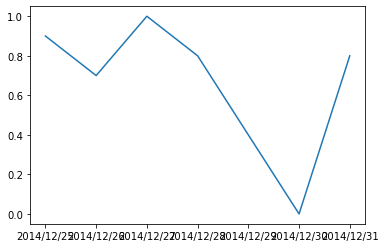

出口溫度


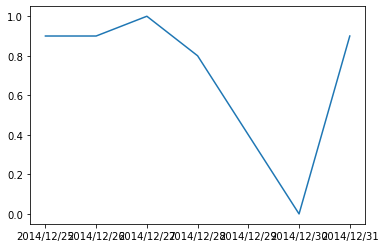

入口壓力


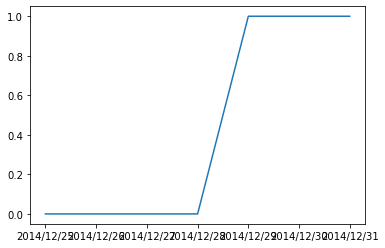

出口壓力


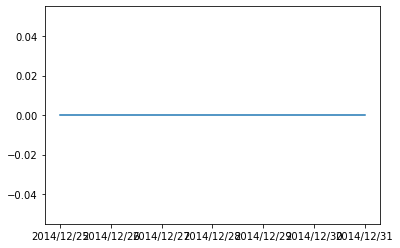

出口溫度.1


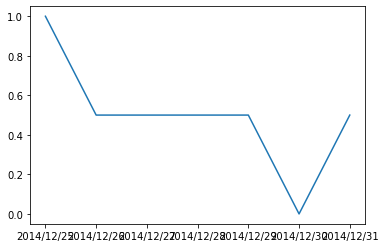

出口流量


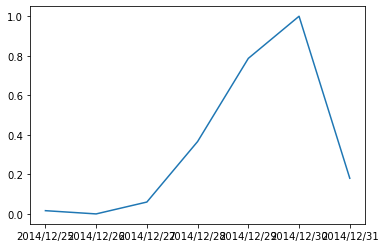

硫酸濃度


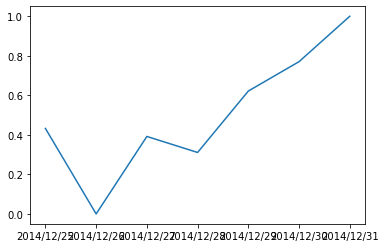

In [16]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
mm = MinMaxScaler()
df[:] = mm.fit_transform(df)
for i in df.columns:
  print(i)
  plt.plot(df[i])
  plt.show()

入口溫度


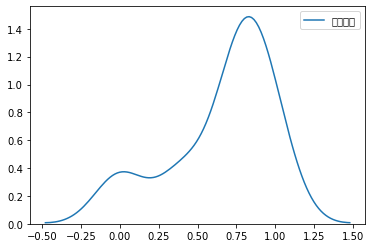

出口溫度


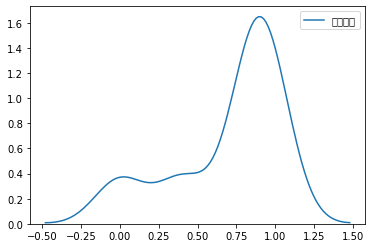

入口壓力


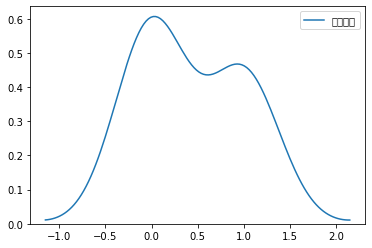

出口壓力


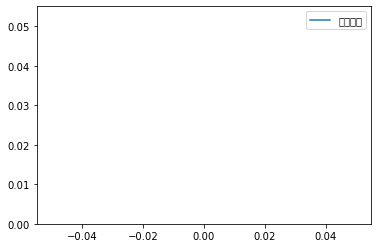

出口溫度.1


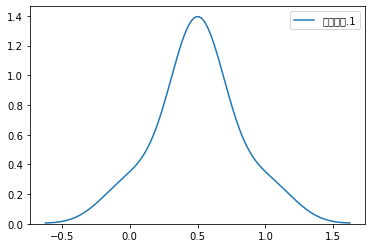

出口流量


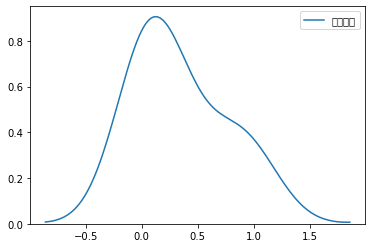

硫酸濃度


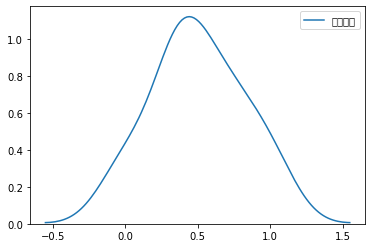

In [17]:
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sb
for i in df.columns:
  print(i)
  sb.kdeplot(df[i])
  plt.show()

In [18]:
df.columns = [i for i in range(len(df.columns)-1)]+['硫酸濃度']
df.head()

,0,1,2,3,4,5,硫酸濃度
2014/12/25,0.9,0.9,0.0,0.0,1.0,0.016393,0.432432
2014/12/26,0.7,0.9,0.0,0.0,0.5,0.000000,0.000000
2014/12/27,1.0,1.0,0.0,0.0,0.5,0.060109,0.391892
2014/12/28,0.8,0.8,0.0,0.0,0.5,0.366120,0.310811
2014/12/29,0.4,0.4,1.0,0.0,0.5,0.786885,0.621622


r2 0.9999912275793401
mape 14.378522793178877


<AxesSubplot:>

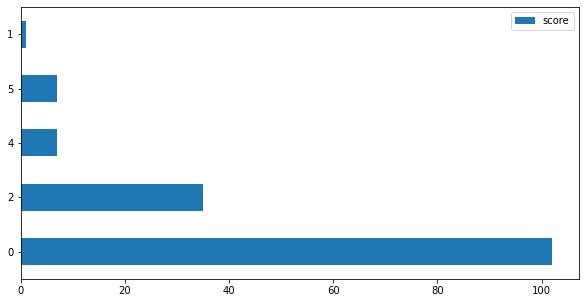

In [19]:
import xgboost
# Creating a Function for MAPE
import numpy as np

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape*100

model = xgboost.XGBRegressor()
x = df.drop('硫酸濃度',axis=1)
y = df['硫酸濃度']
model.fit(x,y)
print('r2',model.score(x,y))
print('mape',mape(model.predict(x),y))
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (10,5)) ## plot top 40 features